In [ ]:
#use this to retrieve L3 and display monthly

In [3]:
import earthaccess
import xarray as xr
auth = earthaccess.login()
# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

In [4]:
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_LANDVI',
    temporal = ("2024-03-01", "2025-02-01"),
    granule_name="*.MO.*.4km.*"
)
fileset = earthaccess.open(results)
ds = xr.open_dataset(fileset[1])

QUEUEING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/12 [00:00<?, ?it/s]

In [10]:
results

[Collection: {'Version': '3.1', 'ShortName': 'PACE_OCI_L3M_LANDVI'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90, 'WestBoundingCoordinate': -180}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-03-31T23:59:59Z', 'BeginningDateTime': '2024-03-05T00:00:00Z'}}
 Size(MB): 317.3418445587158
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240301_20240331.L3m.MO.LANDVI.V3_1.4km.nc'],
 Collection: {'ShortName': 'PACE_OCI_L3M_LANDVI', 'Version': '3.1'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'SouthBoundingCoordinate': -90, 'NorthBoundingCoordinate': 90, 'WestBoundingCoordinate': -180, 'EastBoundingCoordinate': 180}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-04-01T00:00:00Z', 'EndingDateTime': '2024-04-30T23:59:59Z'}}
 Size(MB): 278.57926

In [5]:
# We can open all the files but note there is no time coordinate so we need
# combine="nested" and concat_dim
ds = xr.open_mfdataset(
    fileset,
    combine="nested",
    concat_dim="time")
ds

<xarray.Dataset> Size: 18GB
Dimensions:  (time: 12, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: time, rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 9kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10795892
    data_minimum:                      -783.1385
    data_maximum:                      401.07227

In [6]:
# Let's add the time coord since we will likely want to subset on time later
import pandas as pd
t = pd.date_range(start="2024-03-01", end="2025-02-01", freq="MS")
ds = ds.assign_coords(time=t)
ds

<xarray.Dataset> Size: 18GB
Dimensions:  (time: 12, lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * time     (time) datetime64[ns] 96B 2024-03-01 2024-04-01 ... 2025-02-01
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    ndvi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    evi      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndwi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndii     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cci      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ndsi     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    pri      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    cire     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    car      (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    mari     (time, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 9kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240301_20240331.L3m.MO.LAND...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/LANDVI/3.1
    data_bins:                         10795892
    data_minimum:                      -783.1385
    data_maximum:                      401.07227

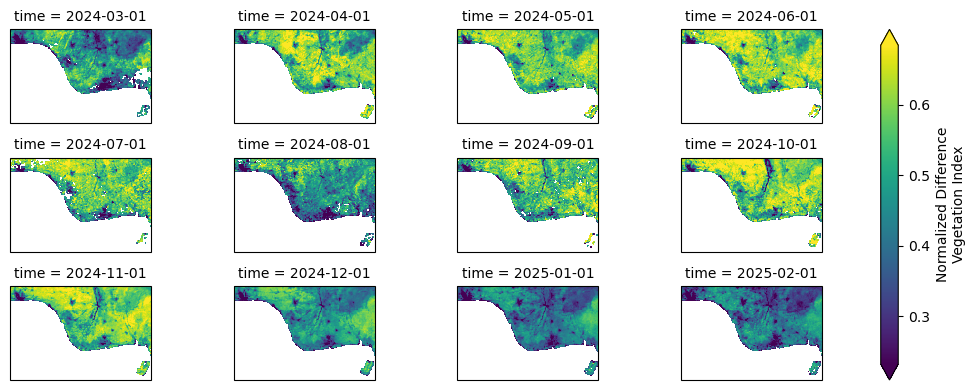

In [22]:
rrs = ds["ndvi"].sel(
    lat=slice(7, 3), 
    lon=slice(3, 9)
)

import cartopy.crs as ccrs
rrs.plot(
    col="time",            # one panel per month
    col_wrap=4,            # 4 columns per row
    robust=True,           # ignore outliers for color scale
    figsize=(12, 4),
    subplot_kws={"projection": ccrs.PlateCarree()},
    transform=ccrs.PlateCarree()
)

In [11]:
ds["ndvi"]

<xarray.DataArray 'ndvi' (time: 12, lat: 4320, lon: 8640)> Size: 2GB
dask.array<concatenate, shape=(12, 4320, 8640), dtype=float32, chunksize=(1, 512, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 96B 2024-03-01 2024-04-01 ... 2025-02-01
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Normalized Difference Vegetation Index
    standard_name:  normalized_difference_vegetation_index
    valid_min:      -1000.0
    valid_max:      1000.0
    display_scale:  linear
    display_min:    -0.05
    display_max:    0.9152